In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
# import the necessary packages

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # fetch the MNIST dataset

In [3]:
X, y = mnist["data"].astype(np.int64), mnist["target"].astype(np.int64) # get data and target labels
X.shape # show shape of input matrix

(70000, 784)

Describe the data.

In [4]:
print("Target Categories:", np.unique(y)) # show all possible labels
print("Feature range:", np.min(X), np.max(X)) # show range of features

Target Categories: [0 1 2 3 4 5 6 7 8 9]
Feature range: 0 255


We have 0 to 255 as pixel range. Time to visualize some handwritten digits.

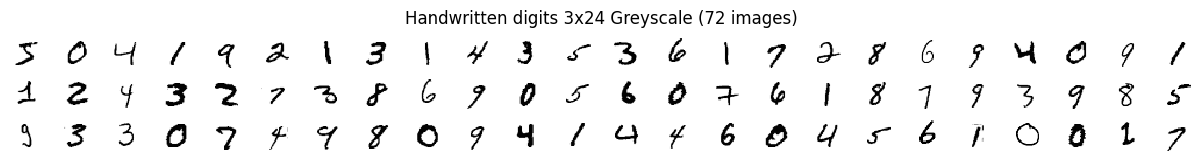

In [5]:
wsize = 24 # grid width
hsize = 3 # grid height
fig, axes = plt.subplots(hsize,wsize,figsize=(wsize/2,hsize/2),layout="constrained") # create subplots

c = 0
for i in range(hsize):
    for j in range(wsize):
        axes[i][j].imshow(X[c].reshape((28,28)), interpolation='none', cmap=cm.Greys) # display digit in the grid
        axes[i][j].axis('off') # turn off axes
        c += 1
plt.suptitle(f"Handwritten digits {hsize}x{wsize} Greyscale ({wsize*hsize} images)")
plt.show() # show the plot

Now split the dataset into train and test.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split data to train and test

Now let's use pipeline to train a linear SVM while using the one-versus-all classifier for the dataset. But first we will scale dataset using min max scaler.

In [7]:
linear_svm_clf = Pipeline([('scaler', MinMaxScaler()), # use min max scaler to scale the pixel ranges from 0-255 to 0-1
                           ('linear_svc', LinearSVC(multi_class='ovr'))]) # use linear SVM and set the necessary parameters
# choose hinge loss as it is default for SVM and choose one versus rest as classifier as we have 10 classes

Now train by using the pipeline.

In [8]:
linear_svm_clf.fit(X_train, y_train) # fit the dataset using the training set

Pipeline(steps=[('scaler', MinMaxScaler()), ('linear_svc', LinearSVC())])

In [9]:
accuracy = linear_svm_clf.score(X_test, y_test) # get the accuracy using the testing set
accuracy

0.9137142857142857

Now let's visualize the confusion matrix to get insights.

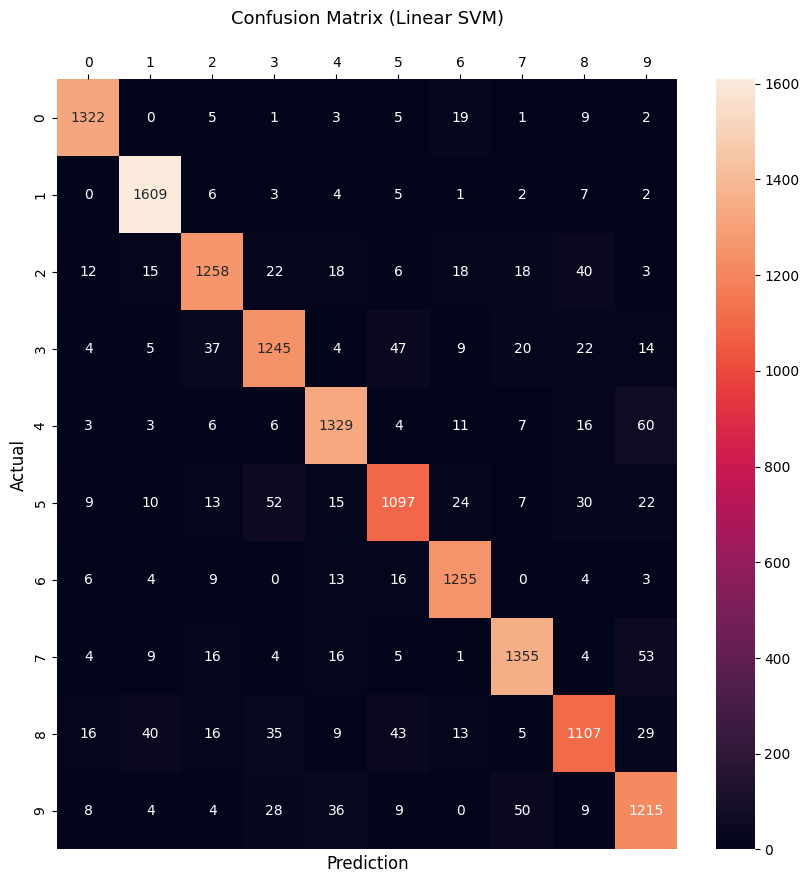

In [10]:
def show_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test) # evaluate the test set
    cf_matrix = confusion_matrix(y_test, y_pred) # compute the confusion matrix of the test set

    digit_labels = np.unique(y) # get all digits in sorted order
    plt.figure(figsize=(10, 10))
    sns.heatmap(cf_matrix, annot=True, fmt='d', xticklabels=digit_labels,yticklabels=digit_labels) 
    # use seaborn to show heatmap of the confusion matrix along with the numbers

    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Prediction', fontsize=12)
    plt.title(f'Confusion Matrix ({title})', fontsize=13, pad=40)
    # add labels and titles

    plt.gca().xaxis.tick_top() # add visual tick marks

    return y_pred # return the predicted labels

y_pred_linear_svm = show_confusion_matrix(linear_svm_clf, X_test, y_test, "Linear SVM") # display the confusion matrix

Show summary report of the linear SVM classifier.

In [11]:
print(classification_report(y_test, y_pred_linear_svm)) # show summary report

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1367
           1       0.95      0.98      0.96      1639
           2       0.92      0.89      0.91      1410
           3       0.89      0.88      0.89      1407
           4       0.92      0.92      0.92      1445
           5       0.89      0.86      0.87      1279
           6       0.93      0.96      0.94      1310
           7       0.92      0.92      0.92      1467
           8       0.89      0.84      0.86      1313
           9       0.87      0.89      0.88      1363

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



Achieved 91% accuracy with the linear SVM classifier so not that great. Let's now use another pipeline that uses rbf kernel with SVM instead.

In [12]:
kernel_svm_ovr_clf = Pipeline([('scaler', MinMaxScaler()), # use min max scaler to scale the pixel ranges from 0-255 to 0-1
                           ('kernel_svc', SVC(kernel='rbf',gamma='scale',decision_function_shape='ovr'))]) # use kernel SVM and set the necessary parameters
# choose rbf as the kernel and choose one versus rest as classifier as we have 10 classes

Now train the pipeline using the kernel SVM.

In [13]:
kernel_svm_ovr_clf.fit(X_train, y_train) # fit the dataset using the training set

Pipeline(steps=[('scaler', MinMaxScaler()), ('kernel_svc', SVC())])

In [14]:
accuracy = kernel_svm_ovr_clf.score(X_test, y_test) # get the accuracy using the testing set
accuracy

0.9802142857142857

98% accuracy is much better since we now use rbf kernel. Let's see the confusion matrix again with the improved classifier.

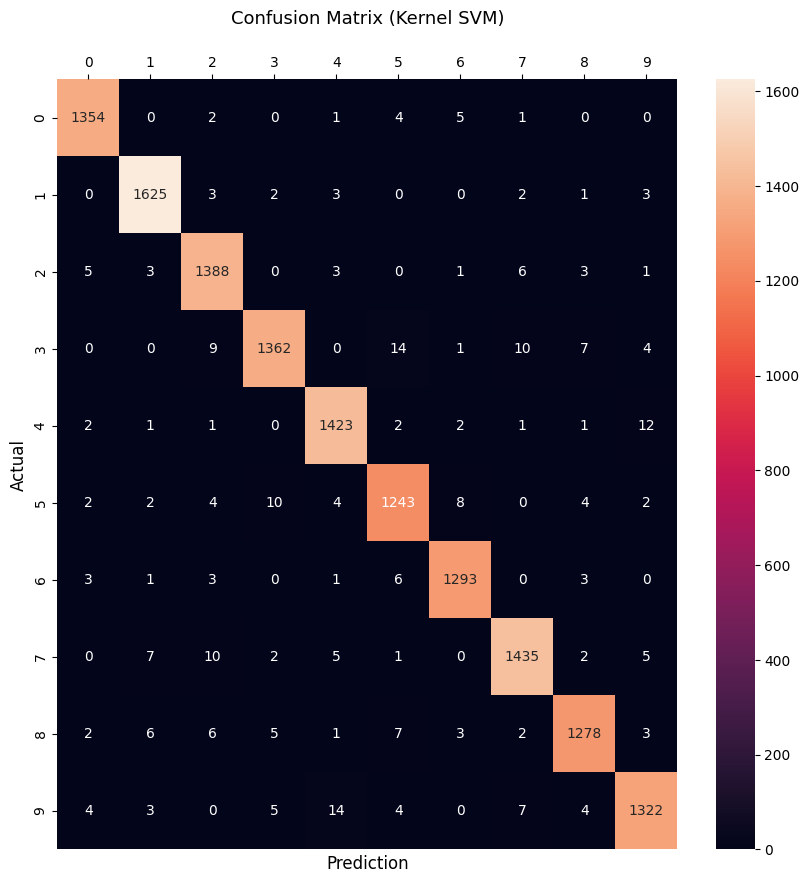

In [15]:
y_pred_kernel_svm = show_confusion_matrix(kernel_svm_ovr_clf, X_test, y_test, "Kernel SVM") # display the confusion matrix

A lot less misclassifications based on the confusion matrix. Now let's see summary report of the kernel SVM classifier.

In [16]:
print(classification_report(y_test, y_pred_kernel_svm)) # show summary report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1367
           1       0.99      0.99      0.99      1639
           2       0.97      0.98      0.98      1410
           3       0.98      0.97      0.98      1407
           4       0.98      0.98      0.98      1445
           5       0.97      0.97      0.97      1279
           6       0.98      0.99      0.99      1310
           7       0.98      0.98      0.98      1467
           8       0.98      0.97      0.98      1313
           9       0.98      0.97      0.97      1363

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

